### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [2]:
# dataset
df = pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Statistical Analysis

In [3]:
# statistical description
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# data information/shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(25, 2)

In [5]:
# data types
df.dtypes


Hours     float64
Scores      int64
dtype: object

In [6]:
# total rows
df.count()

Hours     25
Scores    25
dtype: int64

Text(0, 0.5, 'Scors')

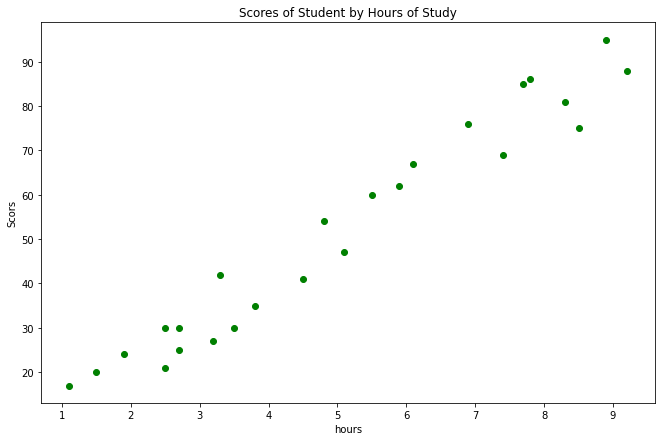

In [7]:
# scatter plot
plt.figure(figsize = (11, 7))
plt.scatter(x = "Hours", y = "Scores", data = df,color='Green')
plt.title("Scores of Student by Hours of Study")
plt.xlabel("hours")
plt.ylabel("Scors")

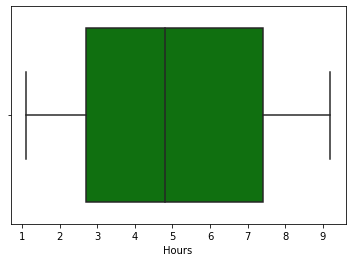

In [8]:
# Most of Students Study Between 2.7 to 7.4 Hours
sns.boxplot(x = df["Hours"],color='Green')

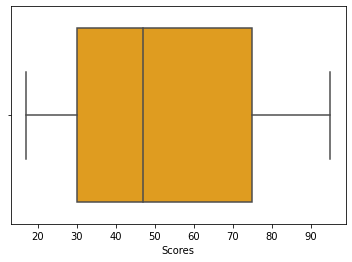

In [9]:
# Most Students have score between 30 to 75
sns.boxplot(x = df["Scores"],color='Orange')

In [10]:
# Q1 25%
Q1 = df.quantile(0.25)
# Q2 50%
Q2 = df.quantile(0.50)
# Q3 75%
Q3 = df.quantile(0.75)
Q1


Hours      2.7
Scores    30.0
Name: 0.25, dtype: float64

In [11]:
# SecondQ 50%
Q2

Hours      4.8
Scores    47.0
Name: 0.5, dtype: float64

In [12]:
# ThirdQ 75%
Q3

Hours      7.4
Scores    75.0
Name: 0.75, dtype: float64

In [13]:
# InterQuantile Range
IQR = Q3 - Q1
IQR

Hours      4.7
Scores    45.0
dtype: float64

Text(0.5, 1.0, 'Frequecy of Hours of study')

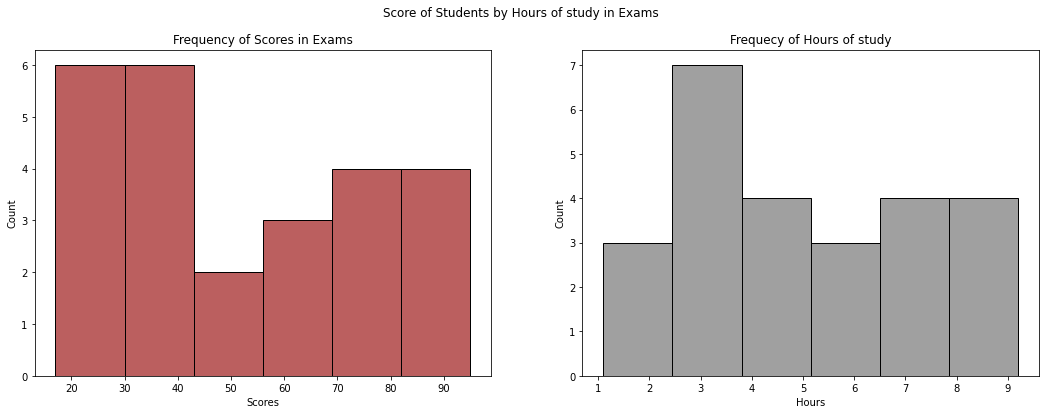

In [14]:
# Histogram of Exam Scores and Study Hours
fig, axes = plt.subplots(1, 2, figsize = (18, 6))
fig.suptitle("Score of Students by Hours of study in Exams")
sns.histplot(ax = axes[0], data = df, x = "Scores",color='Brown')
axes[0].set_title("Frequency of Scores in Exams")
sns.histplot(ax = axes[1], data = df, x = "Hours",color='Grey')
axes[1].set_title("Frequecy of Hours of study")

In [25]:
# We make a rule : for students who have more than 55 in score they Succeed in the exam for others failed.
df["Status"] = df["Scores"] > 55
df["Status"].replace([True, False], ["Succeed", "Failed"], inplace = True)
df.head()

,Hours,Scores,Failed,Succeed,Status
0,2.5,21,1,0,Failed
1,5.1,47,1,0,Failed
2,3.2,27,1,0,Failed
3,8.5,75,0,1,Succeed
4,3.5,30,1,0,Failed


In [16]:
# Count the numbers of stuents who succeed the exam
stat = pd.get_dummies(df["Status"])
df = pd.concat([df, stat], axis = 1)
df.drop("Status", axis = 1, inplace = True)


In [17]:
Succeed_Students = df["Succeed"].sum()
print("Total Number of Succeed Students are " + str(Succeed_Students))

Total Number of Succeed Students are 11


In [18]:
Failed_Students = df["Failed"].sum()
print("Total Number of Failed Students are " + str(Failed_Students))

Total Number of Failed Students are 14


In [19]:
Succeed_Percentage = (Succeed_Students / df.shape[0]) * 100
Succeed_Percentage

44.0

In [20]:
Failed_Percentage = (Failed_Students / df.shape[0]) * 100
Failed_Percentage


56.00000000000001

### Correlation

In [21]:
## Pearson Correlation
pearson_coef, p_value = stats.pearsonr(df["Scores"], df["Hours"])
print("Pearson Coefficient: ", pearson_coef)
print("p_value : ", p_value)

Pearson Coefficient:  0.9761906560220884
p_value :  9.132624467460325e-17


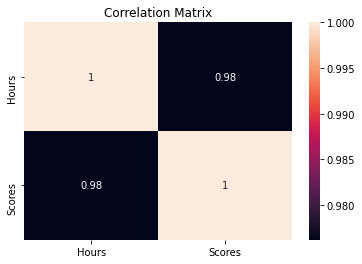

In [22]:
df2 = df.iloc[:, 0:2]
correlation = df2.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

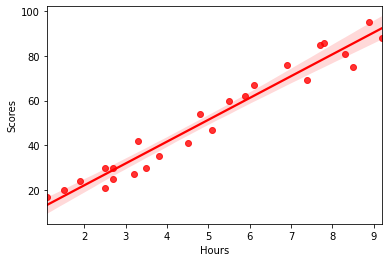

In [23]:
# Scatter Plot
sns.regplot(x = "Hours", y = "Scores", data = df,color='Red')
plt.show()

In [26]:
# Pivot Table
df_group1 = df[["Status", "Hours", "Scores"]]
x = df_group1.groupby(["Status", "Hours"])
x.first()

Scores
Status  Hours        
Failed  1.1        17
        1.5        20
        1.9        24
        2.5        21
        2.7        25
        3.2        27
        3.3        42
        3.5        30
        3.8        35
        4.5        41
        4.8        54
        5.1        47
Succeed 5.5        60
        5.9        62
        6.1        67
        6.9        76
        7.4        69
        7.7        85
        7.8        86
        8.3        81
        8.5        75
        8.9        95
        9.2        88

In [27]:
df_group2 = df[["Status", "Hours", "Scores"]]
y = df_group2.groupby(["Status", "Scores"])
y.first()

Hours
Status  Scores       
Failed  17        1.1
        20        1.5
        21        2.5
        24        1.9
        25        2.7
        27        3.2
        30        3.5
        35        3.8
        41        4.5
        42        3.3
        47        5.1
        54        4.8
Succeed 60        5.5
        62        5.9
        67        6.1
        69        7.4
        75        8.5
        76        6.9
        81        8.3
        85        7.7
        86        7.8
        88        9.2
        95        8.9

### Linear Regression

In [28]:
# train test split
a = df[["Hours"]]
b = df["Scores"]

x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_train)
print(y_predict)

[39.67865467 20.84840735 79.32128059 70.40168976 12.91988217 52.56250809
 78.33021494 34.72332643 84.27660883 93.19619966 62.47316457 36.70545772
 28.77693254 56.52677068 28.77693254 86.25874013 26.79480124 49.58931115
 90.22300272 46.6161142 ]


In [29]:
training_score = lr.score(x_train, y_train)
print("Score pf Training Model = ", training_score) 

Score pf Training Model =  0.9515510725211553


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_predict})  
df 

,Actual,Predicted
22,35,39.678655
17,24,20.848407
24,86,79.321281
23,76,70.401690
14,17,12.919882
1,47,52.562508
10,85,78.330215
13,42,34.723326
8,81,84.276609
6,88,93.196200


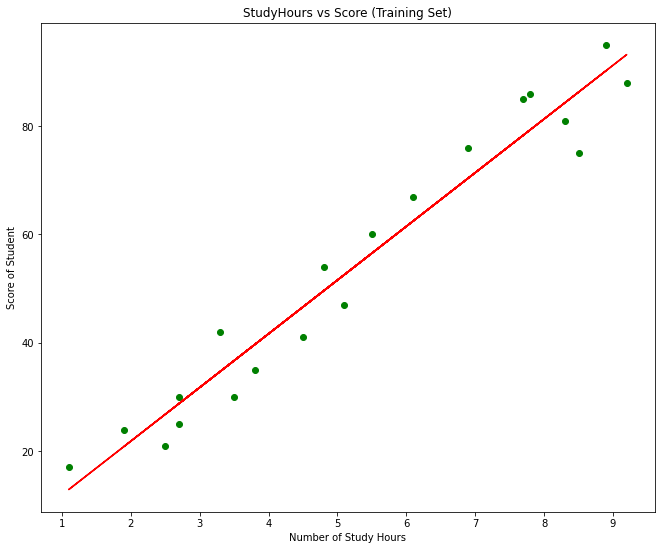

In [31]:
#drawing the best fit Line on the training set :
fig = plt.figure(figsize = (11, 9))
plt.scatter(x_train, y_train,color='Green')
plt.plot(x_train, y_predict, c = "r")
plt.xlabel("Number of Study Hours")
plt.ylabel("Score of Student")
plt.title("StudyHours vs Score (Training Set)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


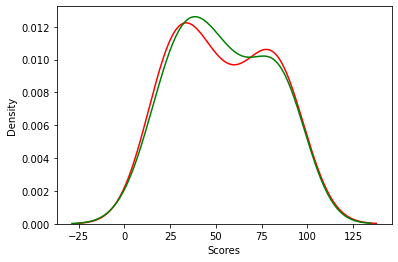

In [32]:
sns.distplot(a = y_train, hist = False, color = "r")
sns.distplot(a = y_predict, hist = False, color = "g")

### Test Set Prediction

In [33]:
# Prediction
y_test_predict = lr.predict(x_test)
print(y_test_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [34]:
# Score
test_score = lr.score(x_test, y_test)
test_score

0.9454906892105354

In [35]:
Comp=pd.DataFrame({'Actual':y_test,'predicted':y_test_predict})
Comp

,Actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


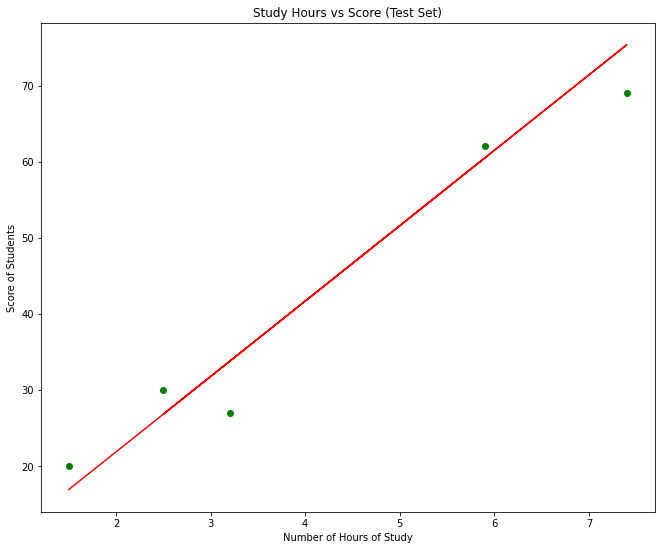

In [36]:
fig = plt.figure(figsize = (11, 9))
plt.scatter(x_test, y_test,color='g')
plt.plot(x_test, y_test_predict, c = "r")
plt.xlabel("Number of Hours of Study")
plt.ylabel("Score of Students")
plt.title("Study Hours vs Score (Test Set)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


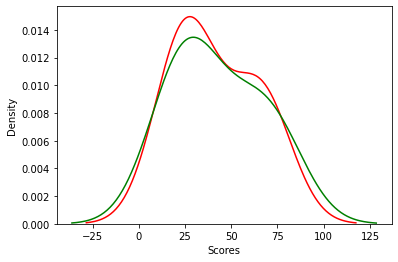

In [37]:
sns.distplot(a = y_test, hist = False, color = "r", label = "Actual Values")
sns.distplot(a = y_test_predict, hist = False, color = "g", label = "Predicted Values")

In [38]:
# Request_Prediction
hours = 9.25
score = lr.predict([[hours]])
print("Number of Hours " + str(hours))
print("Predicted Score = " + str(score[0]))

Number of Hours 9.25
Predicted Score = 93.69173248737539


In [39]:
# Mean Squared Error
MSE = metrics.mean_absolute_error(y_test, y_test_predict)
MSE

4.183859899002982

By Younes MELLOUKI